In [3]:
!pip install spacy

  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
    Uninstalling smart-open-5.1.0:
      Successfully uninstalled smart-open-5.1.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [5]:
tweets=pd.read_csv('Elon_musk.csv',encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
tweets=[Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [7]:
tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [8]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [9]:
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [10]:
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [11]:
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [12]:
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naray\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naray\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
# Tokens count
len(tweets_tokens)

20832

In [19]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in tweets_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next-level', '.', 'Have', 'tried', '?', 'Great', 'interview', '!', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'next', 'even', '!', '!', 'Happy', 'New', 'Year', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'underdoge', ',', 'All', 'thought', 'would', 'fail', ',', 'Himself', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'https://t.co/3rWE9uHSTS', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', ',', 'toddler', 'hodler', 'He', 'definitely', 'issues', ',', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', '<U+0001F923>', '<U+0001F923>', 'This', 'true', 'power', 'https://t.co/Fc9uhQSd7O', 'Any', 'crypto', 'wallet', 'give', 'private'

In [20]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', ':', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', '!', 'https://t.co/3pwt', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', ',', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', '&', 'economic', 'endeavor', '.', 'however', ',', 'https://t.co/9z8ac6skqx', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'https://t.co/7j1c92hdjl', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', ',', 'net', 'value', 'product', 'made', '.', 'must', 'scalable', 'g', 'https://t.co/xmyi7qwsgw', 'it', 'meant', 'price', 'countries', '.', 'only', 'difference', 'taxes', '&', 'shipping', '.', 'this', 'intended', 'earth', ',', 'may', 'ideas', 'apply', 'mars', '<u+0001f923>', '<u+0001f923>', 'xprize', 'team', 'manage', '$', '100m', 'carbon', 'capture', 'prize']


In [21]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['privat', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', ':', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', '!', 'https://t.co/3pwt', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', ',', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', '&', 'econom', 'endeavor', '.', 'howev', ',', 'https://t.co/9z8ac6skqx', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'https://t.co/7j1c92hdjl', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', ',', 'net', 'valu', 'product', 'made', '.', 'must', 'scalabl', 'g', 'https://t.co/xmyi7qwsgw', 'it', 'meant', 'price', 'countri', '.', 'onli', 'differ', 'tax', '&', 'ship', '.', 'thi', 'intend', 'earth', ',', 'may', 'idea', 'appli', 'mar', '<u+0001f923>', '<u+0001f923>', 'xprize', 'team', 'manag', '$', '100m', 'carbon', 'captur', 'prize']


In [30]:
clean_tweets=' '.join(tweets_tokens)
clean_tweets

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(tweets_tokens)

In [33]:
print(cv.vocabulary_)

{'an': 456, 'alien': 421, 'ray': 3283, 'tracing': 4108, 'on': 2856, 'cyberpunk': 1133, 'with': 4484, 'hdr': 1938, 'is': 2214, 'next': 2762, 'level': 2396, 'have': 1928, 'you': 4586, 'tried': 4128, 'it': 2220, 'great': 1856, 'interview': 2191, 'doge': 1290, 'underestimated': 4212, 'congratulations': 1023, 'tesla': 3988, 'china': 910, 'for': 1677, 'amazing': 448, 'execution': 1507, 'last': 2345, 'year': 4572, 'now': 2798, 'to': 4066, 'the': 4008, 'even': 1479, 'more': 2678, 'happy': 1911, 'new': 2760, 'of': 2842, 'ox': 2929, 'https': 2040, 'co': 951, '9wfkmyu2oj': 306, 'frodo': 1714, 'was': 4391, 'underdoge': 4211, 'all': 424, 'thought': 4036, 'he': 1940, 'would': 4511, 'fail': 1551, 'himself': 1990, 'most': 2682, 'zgxjfdzzrm': 4610, 'haha': 1894, 'thanks': 4004, 'indeed': 2125, 'tweets': 4168, 'definitely': 1183, 'do': 1282, 'not': 2790, 'represent': 3360, 'real': 3298, 'world': 4506, 'time': 4053, 'allocation': 426, 'entertaining': 1442, 'outcome': 2905, 'likely': 2418, 'just': 2265, '

In [34]:
print(cv.get_feature_names()[100:200])

['10x', '11', '12', '122m', '13', '14', '15', '150', '150m', '155mph', '15km', '16', '162', '17', '18', '1880s', '19h4u8ta2a', '1b', '1dvhg0ntku', '1m', '1mqxfakpzf', '1oltpnw929', '1spnwbelpa', '1st', '1tukv0hvig', '1wlybpkmzj', '1xhs2awxb9', '1zczinfc4u', '20', '2007', '2008', '2009', '200d', '200mph', '2012', '2017', '2020', '2021', '2024', '2026', '2030', '205zz8al33', '20k', '20km', '20m', '210', '2192', '21st', '22', '225', '23', '230', '24', '25', '250', '250kw', '25guns', '25k', '25th', '2600', '263a', '2640', '2642', '2660', '2665', '26a1', '26dagjltdy', '27', '2705', '28', '28th', '29', '2hx6tla8f7', '2iezyiyyg5', '2ja38z8mre', '2k', '2k8psyqu4j', '2klhnfmgz1', '2m', '2nd', '2v', '2vcoaxsrv3', '2wyticewfr', '2yg5gatgv9', '2z5mrscc4g', '2zlkc8fc2d', '30', '300', '300km', '301', '304', '304l', '30km', '30m', '31', '326rkueyw8', '33', '330', '34o80p1hi6', '360']


C:\Users\naray\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
print(tweetscv.toarray().shape)

(20832, 4627)


In [37]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(tweets_tokens)

In [38]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', 'about', 'all', 'also', 'an', 'and', 'are', 'as', 'at', 'be', 'best', 'better', 'but', 'by', 'can', 'co', 'coming', 'could', 'crew', 'do', 'dragon', 'earth', 'falcon', 'few', 'first', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'if', 'in', 'is', 'it', 'just', 'launch', 'like', 'lot', 'make', 'maybe', 'model', 'more', 'most', 'much', 'my', 'need', 'new', 'next', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'our', 'out', 'people', 'probably', 'production', 're', 'rt', 'should', 'so', 'some', 'soon', 'spacex', 'starship', 'still', 'sure', 'tesla', 'than', 'that', 'the', 'there', 'they', 'this', 'time', 'to', 'too', 'true', 'very', 'was', 'we', 'what', 'will', 'with', 'would', 'yeah', 'year', 'yes', 'you', 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(tweets_tokens)

In [40]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['000', '0001f3b6', '0001f495', '0001f525', '0001f5a4', '0001f923', '0435', '043b', '043e', '10', '20', '2020', '2192', '30', '40', '60', 'able', 'about', 'absolutely', 'access', 'accurate', 'actually', 'after', 'again', 'ago', 'agree', 'ai', 'air', 'all', 'almost', 'already', 'also', 'although', 'am', 'amazing', 'an', 'and', 'another', 'any', 'appreciated', 'are', 'around', 'as', 'astronauts', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'battery', 'be', 'because', 'been', 'before', 'being', 'berlin', 'best', 'beta', 'better', 'between', 'big', 'bigger', 'bit', 'boca', 'body', 'booster', 'both', 'brain', 'bs', 'build', 'but', 'by', 'call', 'called', 'can', 'car', 'cargo', 'cars', 'change', 'close', 'co', 'cold', 'come', 'coming', 'companies', 'complete', 'completed', 'completing', 'confirmed', 'congratulations', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crew', 'critical', 'curevac', 'cybertruck', 'data', 'day', 'days', 'deep', 'definitely', 'design', 'did', 'didn', 

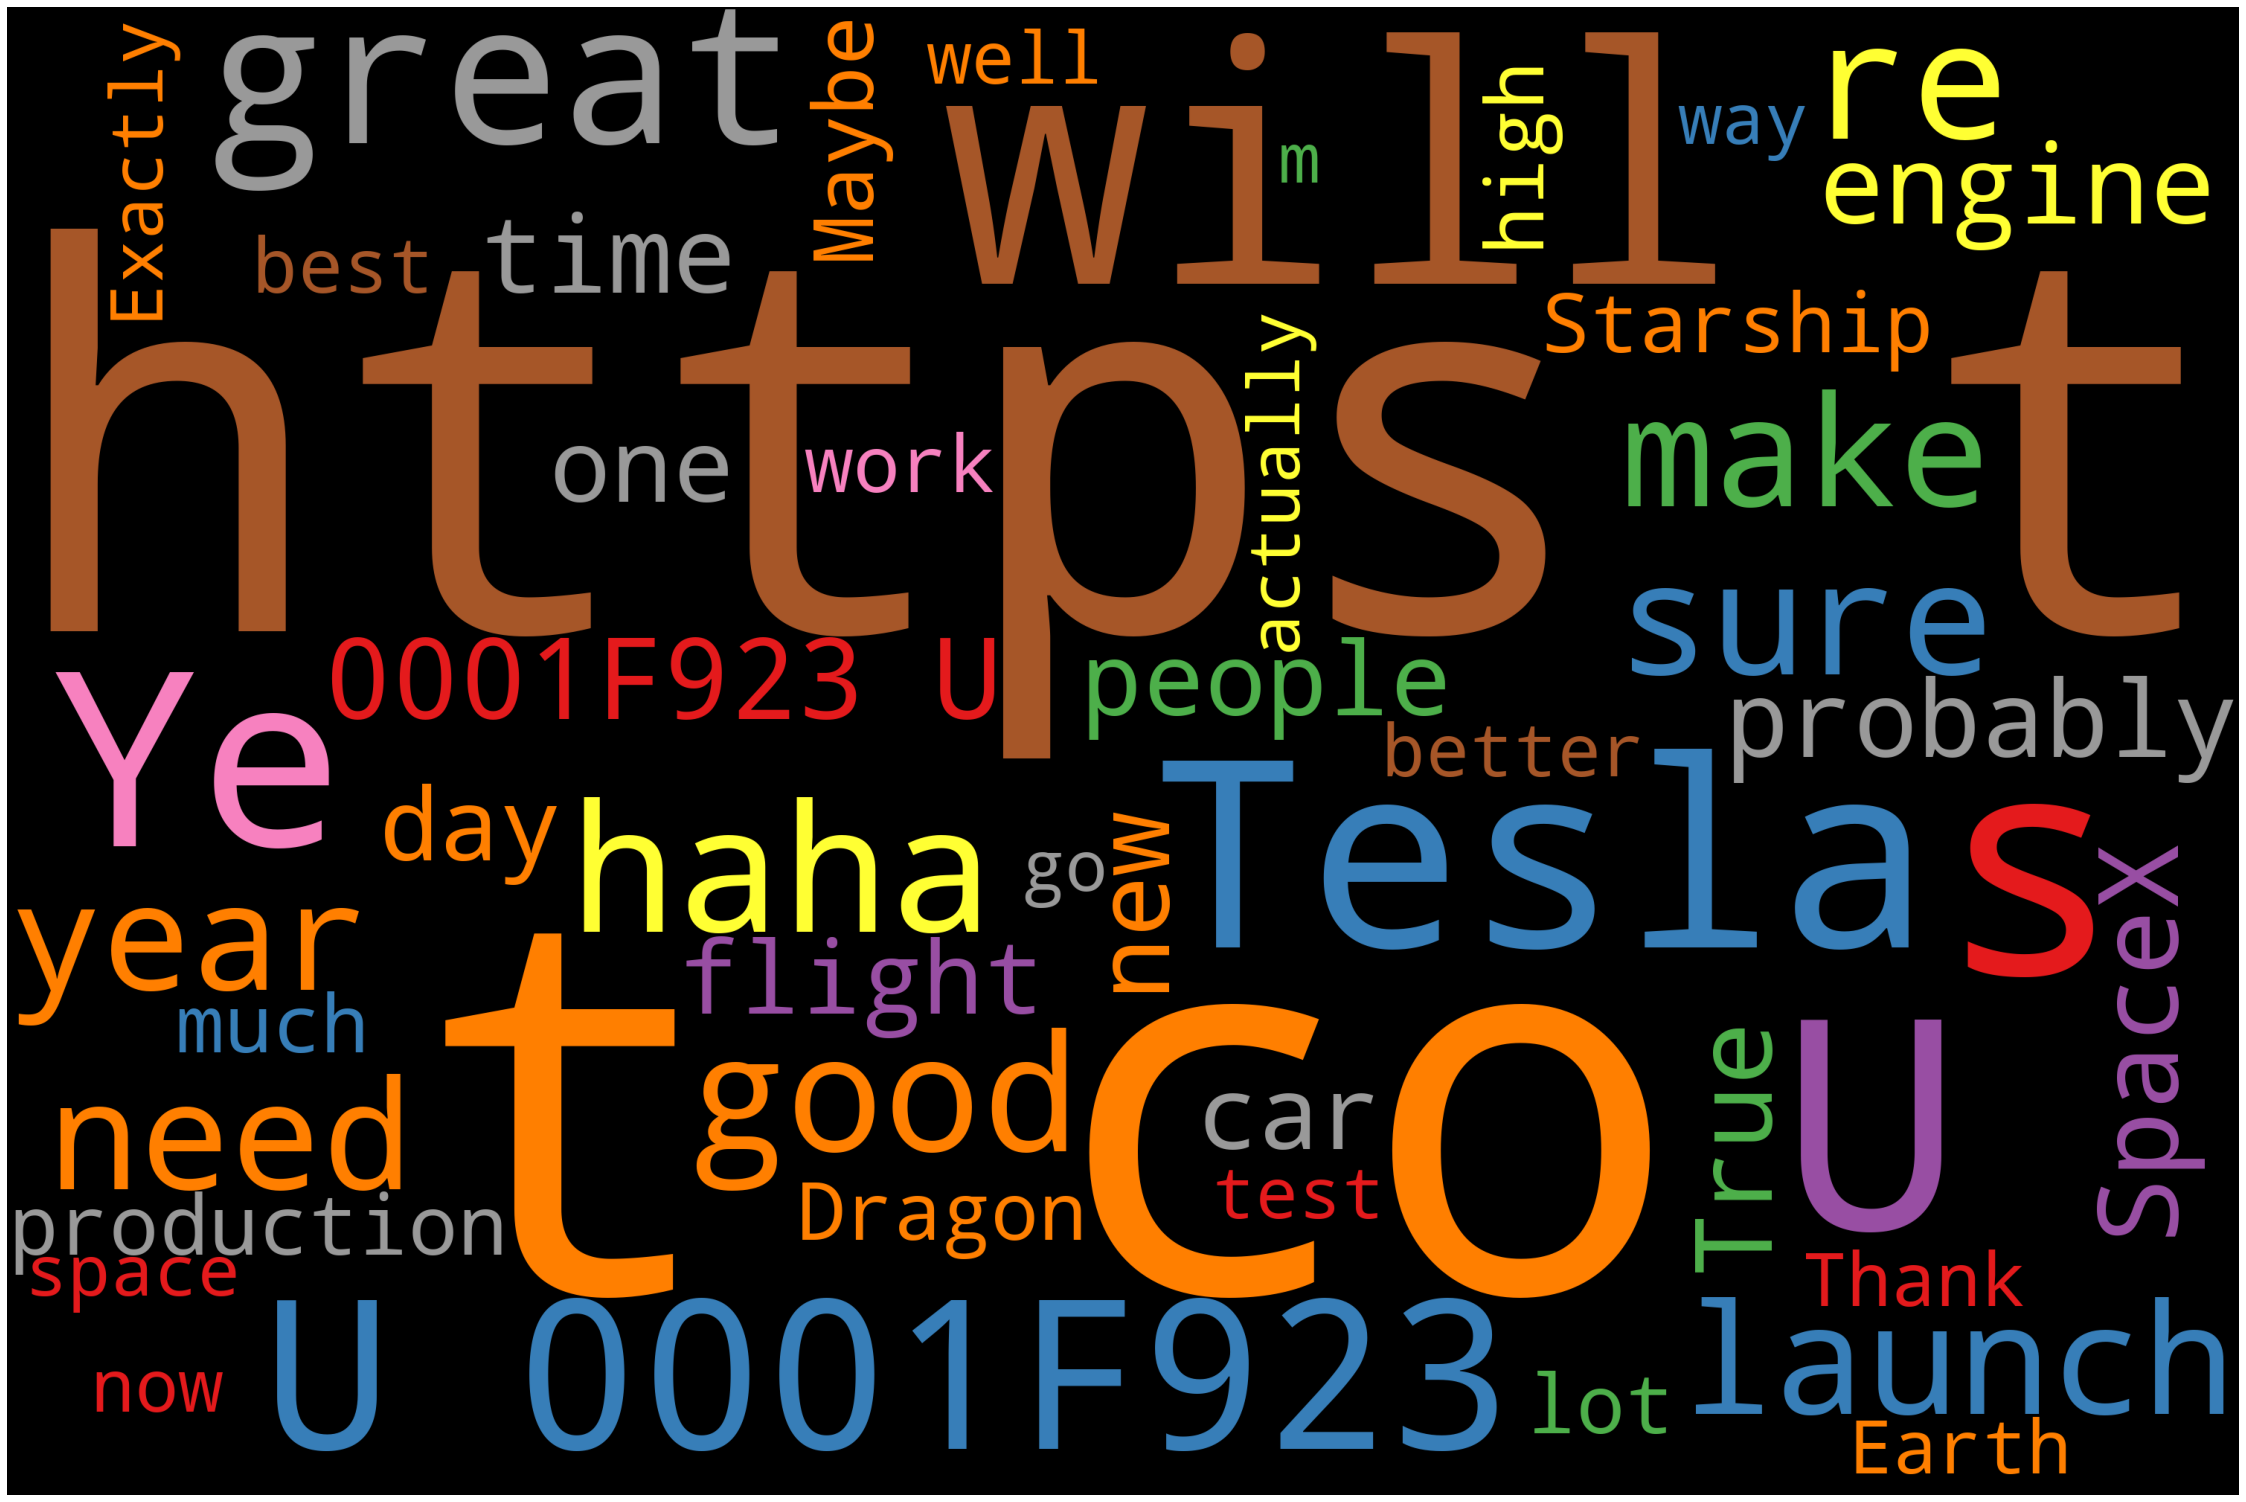

In [41]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [49]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(tweets_tokens)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,co,657
1,https,655
2,the,487
3,to,400
4,is,356
5,of,315
6,in,221
7,it,194
8,for,194
9,we,172


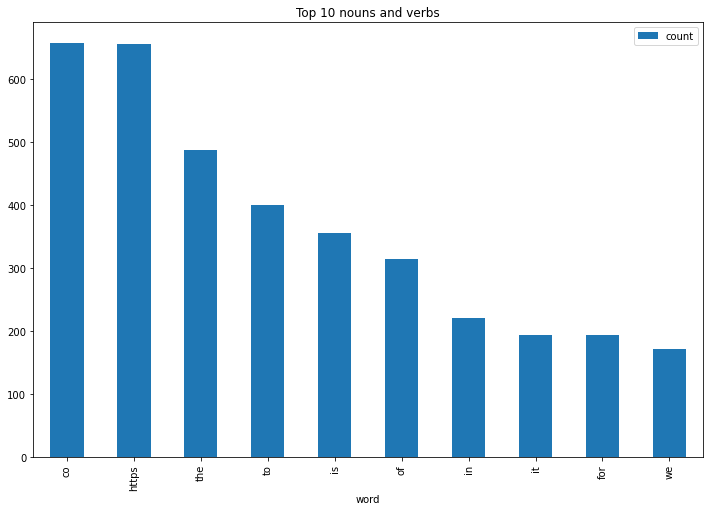

In [50]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [51]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [54]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [59]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [64]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,13,0
1,Have you tried it?,4,1
2,@joerogan @Spotify Great interview!,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,13,3
4,Now on to the next for even more!!,8,4
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",11,919
920,"It may never pay out, as the stock cant b ht...",31,920
921,Details Aug 28.,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,47,922
